## OilyGiant mining company. Task is to find the best place for a new well.

Data on oil samples are given for three seperate regions. The task is to build a linear regression model to help 
pick the region with the highest profit margin. Then. using the bootstrapping technique, analyze potential profit and risks
through measures such as rmse and risk of losses. Three featurers are necessary for the moel and a target variable is 
included for supervised learning. 

Conditions:

* Only linear regression is suitable for model training (the rest are not sufficiently predictable).
* When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
* The budget for development of 200 oil wells is 100 USD million.
* One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
* After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import stats as st

## Collect the oil well parameters in the selected region: oil quality and volume of reserves;

In [2]:
try:
    df_0 = pd.read_csv('geo_data_0.csv')

except FileNotFoundError:
    df_0 = pd.read_csv('geo_data_0.csv')

try:
    df_1 = pd.read_csv('geo_data_1.csv')

except FileNotFoundError:
    df_1 = pd.read_csv('geo_data_1.csv')

try:
    df_2 = pd.read_csv('geo_data_2.csv')

except FileNotFoundError:
    df_2 = pd.read_csv('geo_data_2.csv')

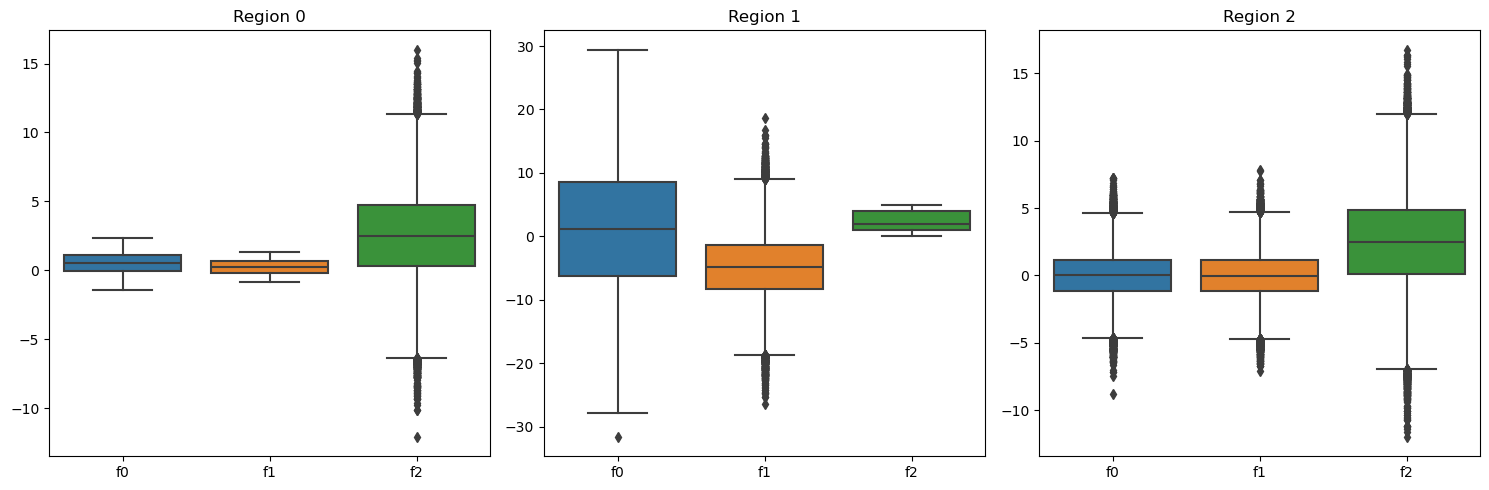

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot boxplots for each feature in data_0
sns.boxplot(data=df_0[['f0', 'f1', 'f2']], ax=axes[0])
axes[0].set_title('Region 0')

# Plot boxplots for each feature in data_1
sns.boxplot(data=df_1[['f0', 'f1', 'f2']], ax=axes[1])
axes[1].set_title('Region 1')

# Plot boxplots for each feature in data_2
sns.boxplot(data=df_2[['f0', 'f1', 'f2']], ax=axes[2])
axes[2].set_title('Region 2')

# Show the plots
plt.tight_layout()
plt.show()

Presence of outliers in all three regions. Region 0 and Region 1 both have one feature column with many outliers and region 2 
has outliers in all three categrories. 

## Train and test the model for each region

In [4]:
def train_and_evaluate_model(df, target_column, id_column, numeric_features, test_size=0.25, random_state=12345):
    # Check for duplicate rows
    duplicates = df[df.duplicated()]
    if not duplicates.empty:
        print("Duplicate rows found:")
        print(duplicates)
    else:
        print("No duplicate rows found.")
    
    # Check for duplicate IDs
    duplicate_ids = df[id_column].duplicated().sum()
    print(f"Number of duplicate IDs: {duplicate_ids}")
    
    # Keep first instance of duplicated IDs
    df = df.drop_duplicates(subset=id_column, keep='first')
    duplicate_ids_after = df[id_column].duplicated().sum()
    print(f"Number of duplicate IDs after dropping duplicates: {duplicate_ids_after}")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values in each column:")
    print(missing_values)
    
    # Describe the DataFrame
    print("Summary statistics of the DataFrame:")
    print(df.describe())
    
    # Split the target and features
    target = df[target_column]
    features = df.drop([target_column, id_column], axis=1)

    # Split the data into training and validation sets
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )

    # Scale the numeric features
    scaler = StandardScaler()
    scaler.fit(features_train[numeric_features])
    features_train[numeric_features] = scaler.transform(features_train[numeric_features])
    features_valid[numeric_features] = scaler.transform(features_valid[numeric_features])

    # Train the model
    model = LinearRegression()
    model.fit(features_train, target_train)

    # Make predictions on the validation set
    predictions_valid = model.predict(features_valid)

    # Convert predictions to pandas Series with the same index as y_valid
    predictions_valid = pd.Series(predictions_valid, index=target_valid.index)

    # Calculate RMSE
    rmse = mean_squared_error(target_valid, predictions_valid) ** 0.5

    print(target_valid.info())
    print(predictions_valid.info())

    # Print results
    print("RMSE of the linear regression model on the validation set:", rmse)
    print("Average volume of predicted reserves: ", np.mean(predictions_valid))
    print("Average volume of targeted reserves: ", np.mean(target_valid))

    # Calculate and print standard deviation of target
    std_target = df[target_column].std()
    print(f"Standard Deviation of Target: {std_target}")

    print("target shape: ", target_valid.shape)
    print("pred shape:  ", predictions_valid.shape)
    common_indices = target_valid.index.intersection(predictions_valid.index)
    # Filtering both dataframes to include only common indices
    target_valid = target_valid.loc[common_indices]
    predictions_valid = predictions_valid.loc[common_indices]
    print(f"Target_valid_0 indices length: {len(target_valid)}")
    print(f"Predictions_valid_0 indices length: {len(predictions_valid)}")


    return model, rmse, predictions_valid, target_valid

## Region 0

In [5]:
model_0, rmse_0, predictions_valid_0, target_valid_0 = train_and_evaluate_model(
    df_0, target_column='product', id_column='id', numeric_features=['f0', 'f1', 'f2']
)

No duplicate rows found.
Number of duplicate IDs: 10
Number of duplicate IDs after dropping duplicates: 0
Missing values in each column:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Summary statistics of the DataFrame:
                 f0            f1            f2       product
count  99990.000000  99990.000000  99990.000000  99990.000000
mean       0.500454      0.250141      2.502629     92.499684
std        0.871844      0.504430      3.248149     44.288304
min       -1.408605     -0.848218    -12.088328      0.000000
25%       -0.072572     -0.200877      0.287784     56.497069
50%        0.502405      0.250252      2.515969     91.847928
75%        1.073626      0.700640      4.715035    128.563699
max        2.362331      1.343769     16.003790    185.364347
<class 'pandas.core.series.Series'>
Index: 24998 entries, 49468 to 17774
Series name: product
Non-Null Count  Dtype  
--------------  -----  
24998 non-null  float64
dtypes: float64(1)
memor

In [6]:
results_0 = pd.DataFrame({'Target': target_valid_0, 'Predicted': predictions_valid_0})

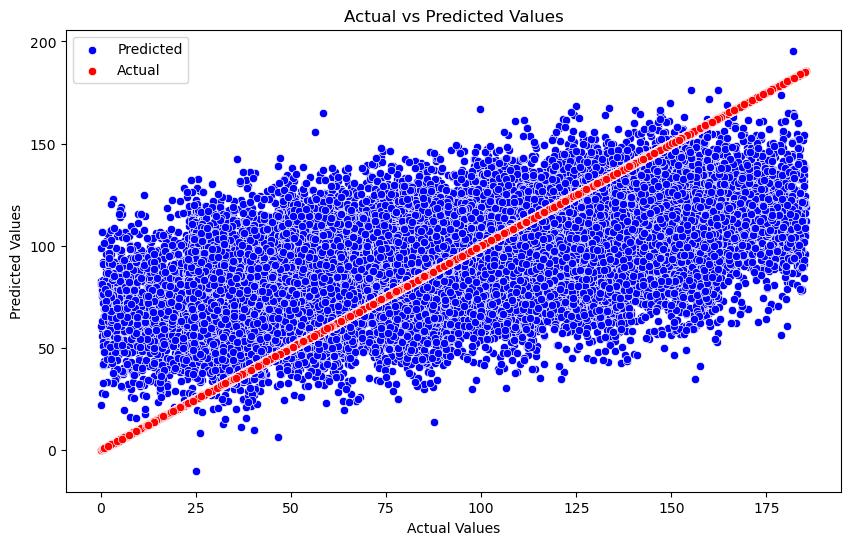

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_0['Target'], y=results_0['Predicted'], color='blue', label='Predicted')
sns.scatterplot(x=results_0['Target'], y=results_0['Target'], color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

* High rmse, but both actual and predicted volumes are fairly close. 

## Region 1

In [8]:
model_1, rmse_1, predictions_valid_1, target_valid_1 = train_and_evaluate_model(
    df_1, target_column='product', id_column='id', numeric_features=['f0', 'f1', 'f2']
)

No duplicate rows found.
Number of duplicate IDs: 4
Number of duplicate IDs after dropping duplicates: 0
Missing values in each column:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Summary statistics of the DataFrame:
                 f0            f1            f2       product
count  99996.000000  99996.000000  99996.000000  99996.000000
mean       1.141209     -4.796608      2.494501     68.823916
std        8.965815      5.119906      1.703579     45.944663
min      -31.609576    -26.358598     -0.018144      0.000000
25%       -6.298551     -8.267985      1.000021     26.953261
50%        1.153055     -4.813172      2.011475     57.085625
75%        8.620964     -1.332816      3.999904    107.813044
max       29.421755     18.734063      5.019721    137.945408
<class 'pandas.core.series.Series'>
Index: 24999 entries, 71748 to 46409
Series name: product
Non-Null Count  Dtype  
--------------  -----  
24999 non-null  float64
dtypes: float64(1)
memory

In [9]:
results_1 = pd.DataFrame({'Target': target_valid_1, 'Predicted': predictions_valid_1})

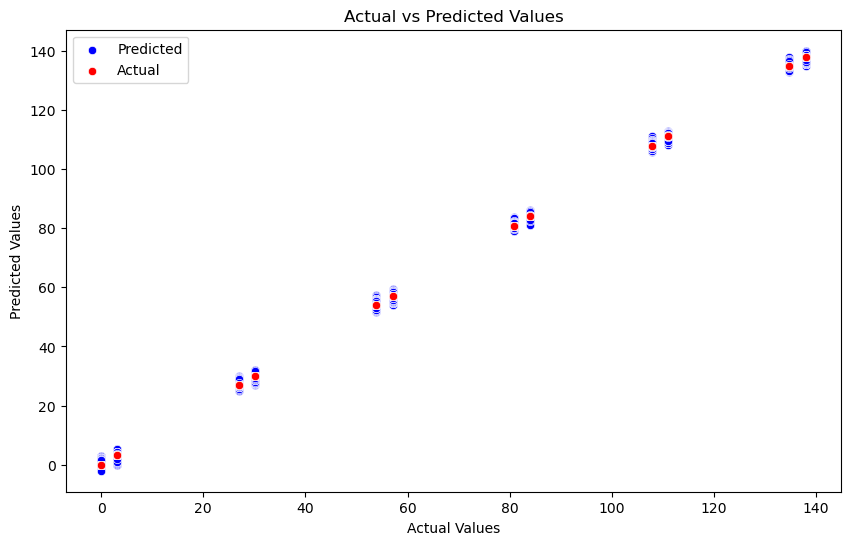

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_1['Target'], y=results_1['Predicted'], color='blue', label='Predicted')
sns.scatterplot(x=results_1['Target'], y=results_1['Target'], color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

* Model's predictions are close to the actual values
* Better model performance compared to region 0, however, average volume of reserves is lower. 

## Region 2

In [11]:
model_2, rmse_2, predictions_valid_2, target_valid_2 = train_and_evaluate_model(
    df_2, target_column='product', id_column='id', numeric_features=['f0', 'f1', 'f2']
)

No duplicate rows found.
Number of duplicate IDs: 4
Number of duplicate IDs after dropping duplicates: 0
Missing values in each column:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Summary statistics of the DataFrame:
                 f0            f1            f2       product
count  99996.000000  99996.000000  99996.000000  99996.000000
mean       0.002002     -0.002159      2.495084     94.998342
std        1.732052      1.730397      3.473482     44.749573
min       -8.760004     -7.084020    -11.970335      0.000000
25%       -1.162328     -1.174841      0.130269     59.450028
50%        0.009424     -0.009661      2.484236     94.925026
75%        1.158477      1.163523      4.858720    130.586815
max        7.238262      7.844801     16.739402    190.029838
<class 'pandas.core.series.Series'>
Index: 24999 entries, 71750 to 46409
Series name: product
Non-Null Count  Dtype  
--------------  -----  
24999 non-null  float64
dtypes: float64(1)
memory

In [12]:
results_2 = pd.DataFrame({'Target': target_valid_2, 'Predicted': predictions_valid_2})

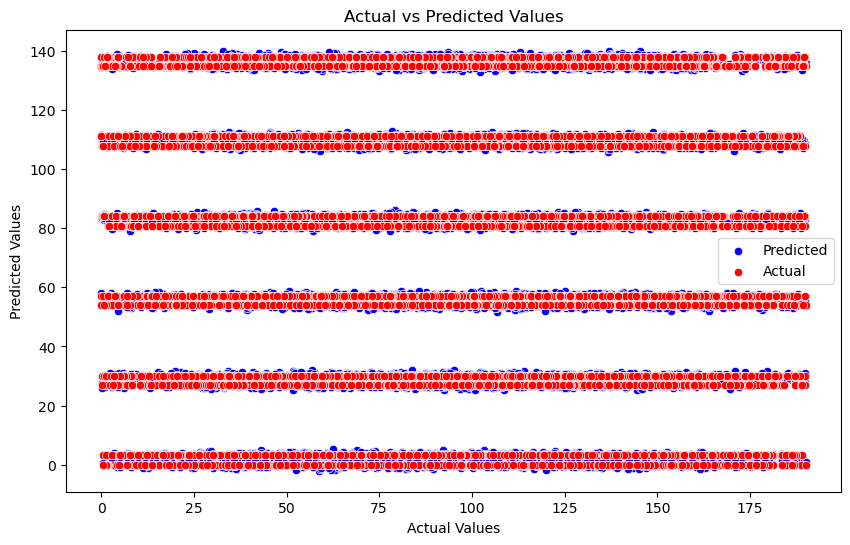

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_2['Target'], y=results_1['Predicted'], color='blue', label='Predicted')
sns.scatterplot(x=results_2['Target'], y=results_1['Target'], color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

* When comparing the image to region 0, I can see the model is not linear and rather placing its predictions into categories.
* Seeing the difference between predicted and target points, I can say this region's model has the worst performance. 

## Prepare for Profit Calculation

In [14]:
#Store all key values for calculations in separate variables.

budget = 100000000  # 100 million USD
revenue_per_barrel = 4.5
revenue_per_unit = 4500
number_of_wells = 200
random_state= 12345

cost_per_well = budget / number_of_wells
min_volume_required = cost_per_well / revenue_per_unit

print(f'Minimum Volume Required per Well: {min_volume_required} thousand barrels')

Minimum Volume Required per Well: 111.11111111111111 thousand barrels


In [15]:
average_volume = df_0['product'].mean()
print(f'Average Volume of Reserves: {average_volume} thousand barrels')

Average Volume of Reserves: 92.50000000000001 thousand barrels


In [16]:
average_volume = df_1['product'].mean()
print(f'Average Volume of Reserves: {average_volume} thousand barrels')

Average Volume of Reserves: 68.82500000000002 thousand barrels


In [17]:
average_volume = df_2['product'].mean()
print(f'Average Volume of Reserves: {average_volume} thousand barrels')

Average Volume of Reserves: 95.00000000000004 thousand barrels


* 111 thousand barrels are needed for the oil wells to be profitable
* All three regions are lower in this number for average volume of reserves

## Write a function to calculate profit from a set of selected oil wells and model predictions

In [18]:
def profit(target, predicted, count, revenue_per_unit, budget):
    indices = predicted.sort_values(ascending=False).index
    selected = target.loc[indices][:count]
    total_revenue = selected.sum() * revenue_per_unit
    return total_revenue - budget

In [19]:
print('Region 0 Profit: ')
profit(target_valid_0, predictions_valid_0, 200,  4500, 100000000)

Region 0 Profit: 


33651872.377002865

In [20]:
print('Region 1 Profit: ')
profit(target_valid_1, predictions_valid_1, 200,  4500, 100000000)

Region 1 Profit: 


24150866.966815114

In [21]:
print('Region 2 Profit: ')
profit(target_valid_2, predictions_valid_2, 200,  4500, 100000000)

Region 2 Profit: 


25012838.532820627

* Region 0 appears to be the most profitable. However, it's rmse value indicates theres plenty of room for error. 

## Calculate risks and profit for each region

In [22]:
def bs(target, pred):

    state = np.random.RandomState(12345)
    
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = pred[target_subsample.index]
    
        values.append(profit(target_subsample, probs_subsample, 200, 4500, 100000000))

    values = pd.Series(values)

    # Calculate average profit
    average_profit = values.mean()
    
    # Calculate 95% confidence interval
    lower_bound = values.quantile(0.025)
    upper_bound = values.quantile(0.975)
    
    # Calculate risk of losses
    risk_of_losses = (values < 0).mean() * 100

    print(f"Region 0 - Average Profit: {average_profit}")
    print(f"Region 0 - 95% Confidence Interval: {(lower_bound, upper_bound)}")
    print(f"Region 0 - Risk of Losses: {risk_of_losses}%")

In [23]:
bs(target_valid_0, predictions_valid_0)

Region 0 - Average Profit: 4094280.38621436
Region 0 - 95% Confidence Interval: (-1315360.2870166434, 9443955.827546729)
Region 0 - Risk of Losses: 7.1%


In [24]:
bs(target_valid_1, predictions_valid_1)

Region 0 - Average Profit: 5369025.874874533
Region 0 - 95% Confidence Interval: (1145279.0290238697, 9707879.10995372)
Region 0 - Risk of Losses: 0.8999999999999999%


In [25]:
bs(target_valid_2, predictions_valid_2)

Region 0 - Average Profit: 3537903.6273094197
Region 0 - 95% Confidence Interval: (-1591940.31191328, 8756525.028711317)
Region 0 - Risk of Losses: 10.2%


## Conclusion

After training and testing the model of the three regions, region one had the highest profit potential; however, its rmse value was roughly 30x higher, which gave more room for error and higher risk of loss. From the start, I could see that region 
three would have the highest risk of loss, and this was confirmed after the bootstrapping method. Overall, the risk of loss is low in the second region, and it is apparent that it contains the highest average profit. For these reasons, I suggest the second region to develop oil wells. 